In [24]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np

Reading the CSV file that resulted from merging the tables: 
- Expenditures Per Pupil
- Inexperienced Teachers and Principals
- Teachers Teaching Out of Certification
- Accountability Status

In [27]:
df = pd.read_csv("../Data/Expendatures Teacher Inexperience Out of Cert and Accountability")
# Get rid of the 4 schools with crazy high funding. 
print(df.OVERALL_STATUS.value_counts())
overall_status_values_2021 = ("Good Standing", "Targeted Support and Improvement", "Comprehensive Support and Improvement")
overall_status_values_2022 = ("Local Support and Improvement", "Comprehensive Support and Improvement", "Additional Targeted Support and Improvement", "Targeted Support and Improvement")
df = df.loc[(df.PER_FED_STATE_LOCAL_EXP < 80000) & (df.OVERALL_STATUS.isin(overall_status_values_2021))]

OVERALL_STATUS
Good Standing                            4676
Targeted Support and Improvement          259
Comprehensive Support and Improvement     228
Target District                           185
Name: count, dtype: int64


In [28]:
df['OVERALL_STATUS'].value_counts()

OVERALL_STATUS
Good Standing                            4626
Targeted Support and Improvement          258
Comprehensive Support and Improvement     226
Name: count, dtype: int64

New Column Indicating if Accountability Status is 

Violin Plots to look for single-feature clustering

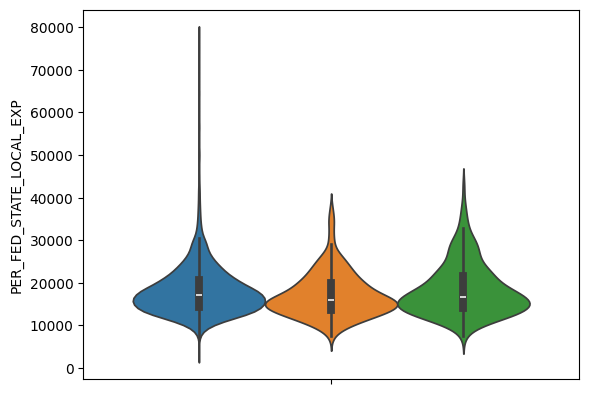

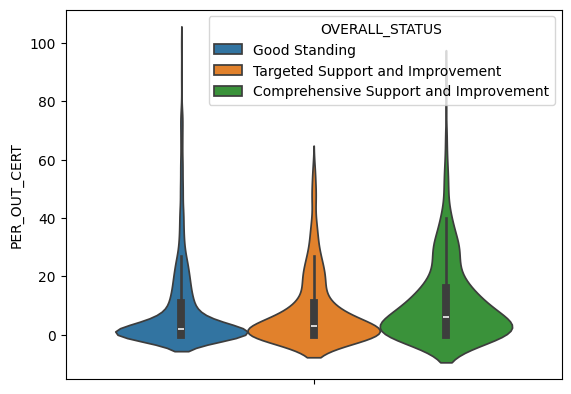

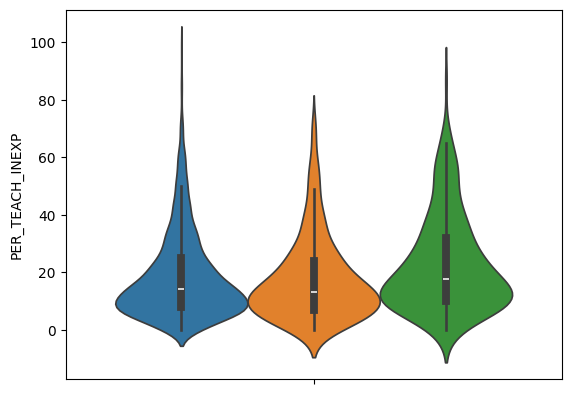

In [29]:
for index, parameter in enumerate(("PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP")):
    sns.violinplot(df, y=parameter, hue="OVERALL_STATUS", legend=(index == 1))
    plt.show()

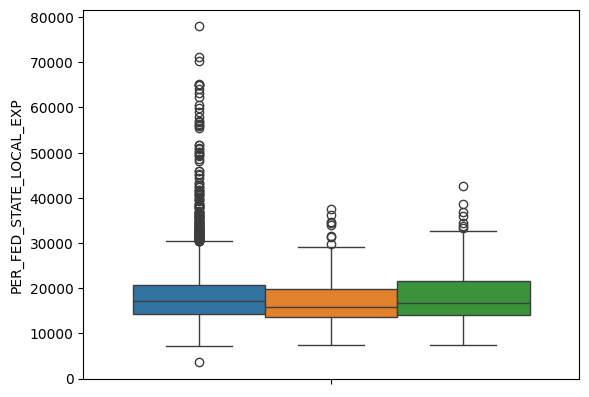

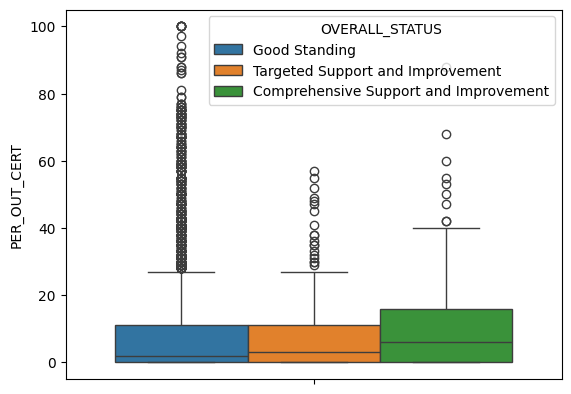

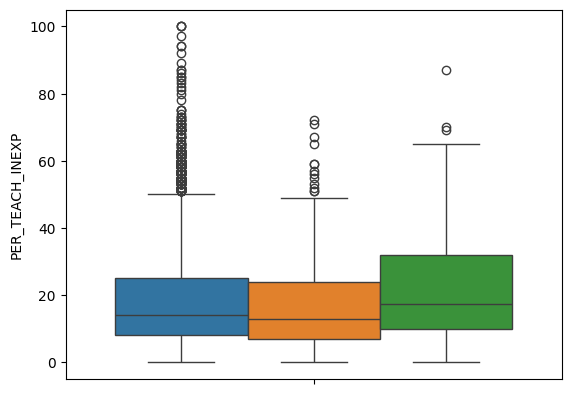

In [30]:
for index, parameter in enumerate(("PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP")):
    sns.boxplot(df, y=parameter, hue="OVERALL_STATUS", legend=(index == 1))
    plt.show()

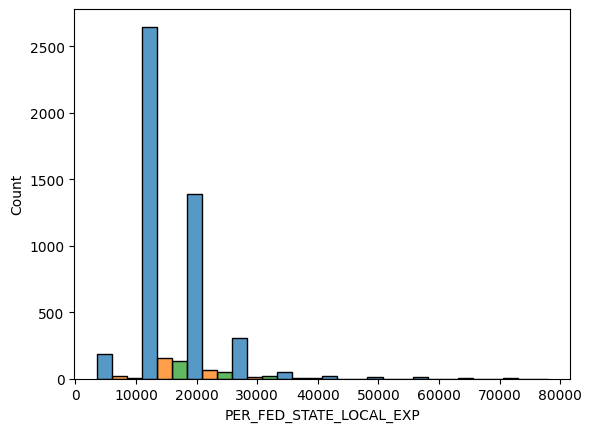

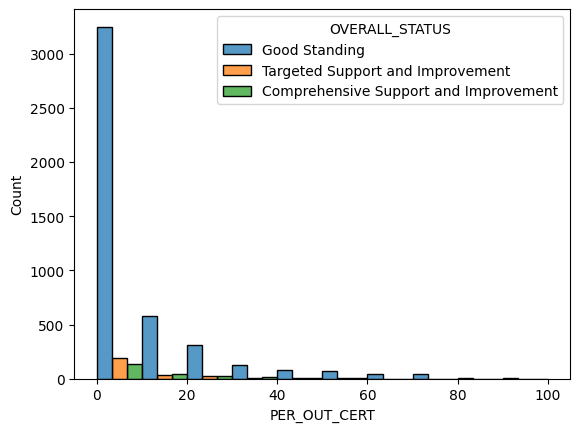

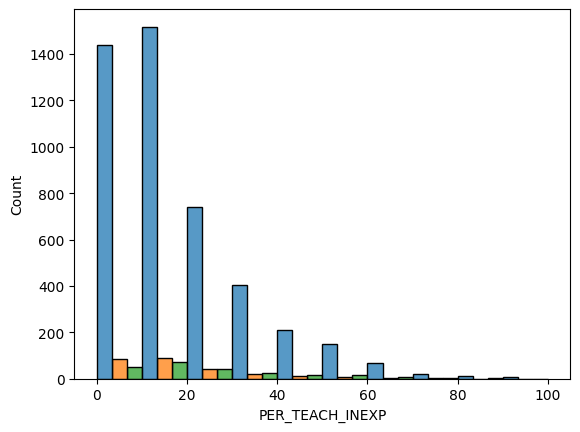

In [31]:
for index, parameter in enumerate(("PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP")):
    sns.histplot(df, x=parameter, bins=10, hue="OVERALL_STATUS", legend=(index == 1), multiple="dodge")
    plt.show()

<Axes: xlabel='PER_OUT_CERT', ylabel='PER_TEACH_INEXP'>

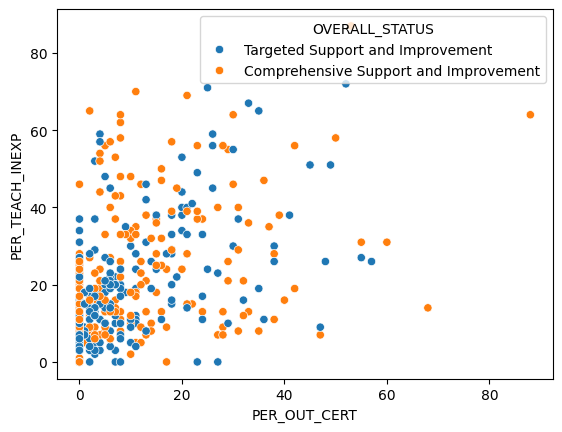

In [32]:
sns.scatterplot(data=df.loc[(df['OVERALL_STATUS'] != "Good Standing") & (df['OVERALL_STATUS'] != "Local Support and Improvement")], 
            x="PER_OUT_CERT", 
            y="PER_TEACH_INEXP", 
            hue="OVERALL_STATUS"
            )
# df['OVERALL_STATUS'] != "Local Support and Improvement"

<Axes: xlabel='PER_OUT_CERT', ylabel='PER_TEACH_INEXP'>

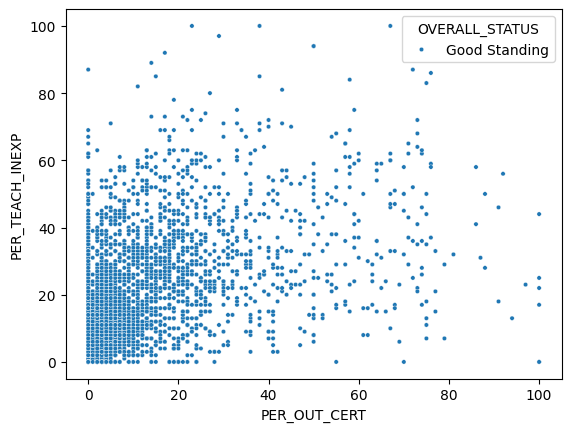

In [58]:
sns.scatterplot(data=df.loc[(df['OVERALL_STATUS'] == "Good Standing") | (df['OVERALL_STATUS'] == "Local Support and Improvement")], 
            x="PER_OUT_CERT", 
            y="PER_TEACH_INEXP", 
            hue="OVERALL_STATUS", 
            s=10
            )
# df['OVERALL_STATUS'] != "Local Support and Improvement"

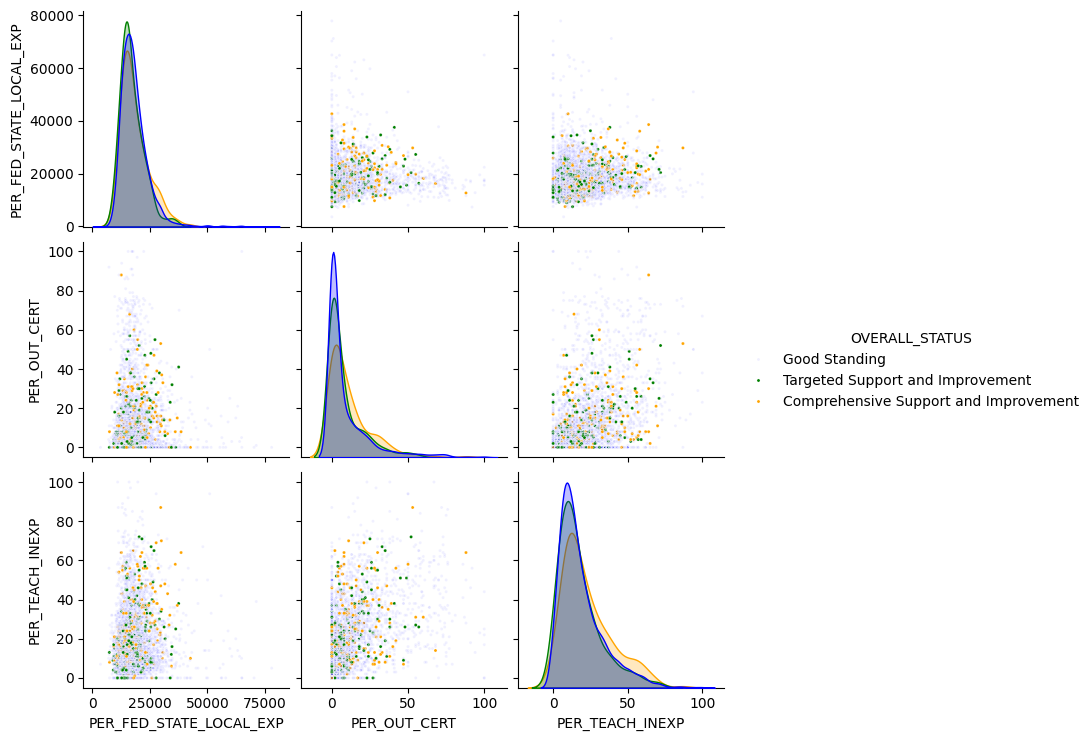

In [72]:
col_palette = {
    "Good Standing": ("blue", .06), 
    "Comprehensive Support and Improvement": ("orange", 1), 
    "Targeted Support and Improvement": ("green", 1)
}
sns.pairplot(df, 
             x_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP"], 
             y_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP"], 
             hue="OVERALL_STATUS", 
             palette=col_palette, 
             plot_kws={"s": 5}, 
             diag_kws={"common_norm": False}
            #  kind="hex", 
             )

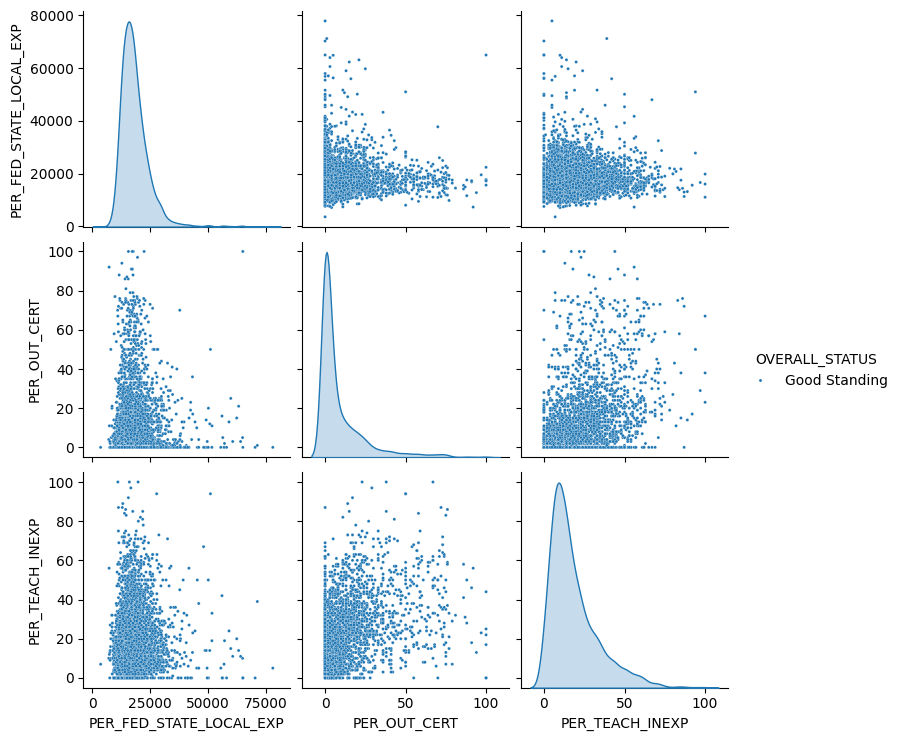

In [48]:
sns.pairplot(df.loc[df['OVERALL_STATUS'] == "Good Standing"], 
             x_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP"], 
             y_vars=["PER_FED_STATE_LOCAL_EXP", "PER_OUT_CERT", "PER_TEACH_INEXP"], 
             hue="OVERALL_STATUS", 
             plot_kws={"s": 5}
             )

In [35]:
df.YEAR.value_counts()

YEAR
2021    5110
Name: count, dtype: int64